# Shape dataset

This notebook aims at presenting the Shapes dataset, a random set of images that depict simple geometrical shapes (*i.e.* squares, triangles, circles). This dataset is inspired from [Mask_RCNN](https://github.com/matterport/Mask_RCNN/tree/master/samples/shapes) repo, where a similar Shape dataset is built for illustration purpose.

## Introduction

Some modules are imported to do the job, as usual:

In [1]:
import numpy as np
import os
import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
env DEEPOSL_CONFIG=../config.ini

env: DEEPOSL_CONFIG=../config.ini


In [3]:
from deeposlandia import utils
from deeposlandia.datasets import shapes

In [10]:
DATAPATH = "../data"
DATASET = "shapes"

## Metadata presentation

The dataset contains some images, splitted in training, validation and testing subsets on the same way as [Mapillary](./1a_mapillary-dataset-presentation.ipynb) dataset.

The images here are `64*64` sized; they are composed of a square (or not), a circle (or not) and a triangle (or not). One can have empty images as well as images with three shapes. Then the shapes may overlap. The background as well as the shapes are randomly coloured. 

In [11]:
print("Number of training images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "64", "training", "images")))))
print("Number of validation images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "64", "validation", "images")))))
print("Number of testing images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", "64", "testing", "images")))))

Number of training images: 100
Number of validation images: 10
Number of testing images: 10


## Some examples

In [12]:
def show_example_image(image_filename):
    im = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", "64", "training", "images", image_filename))
    lab = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", "64", "training", "labels", image_filename))
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(im)
    ax[1].imshow(lab)

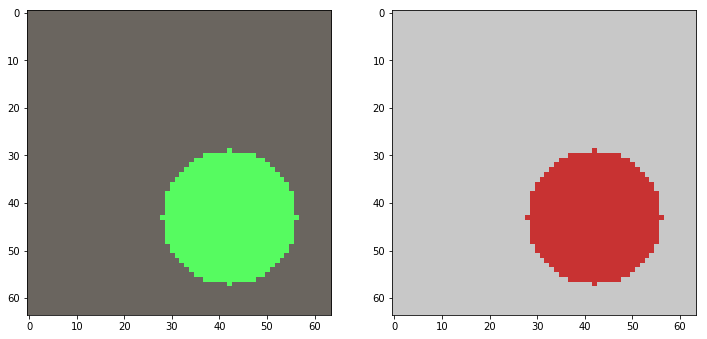

In [13]:
show_example_image("shape_00002.png")

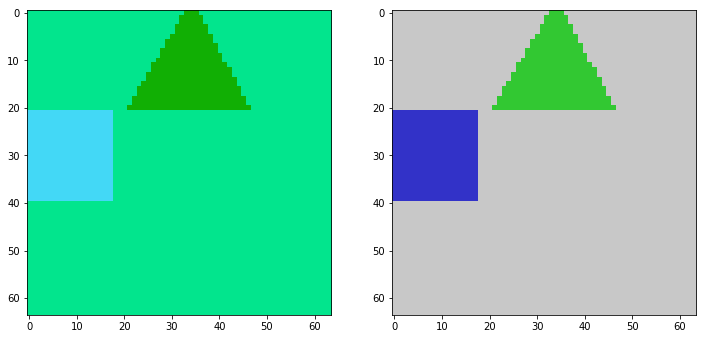

In [14]:
show_example_image("shape_00000.png")

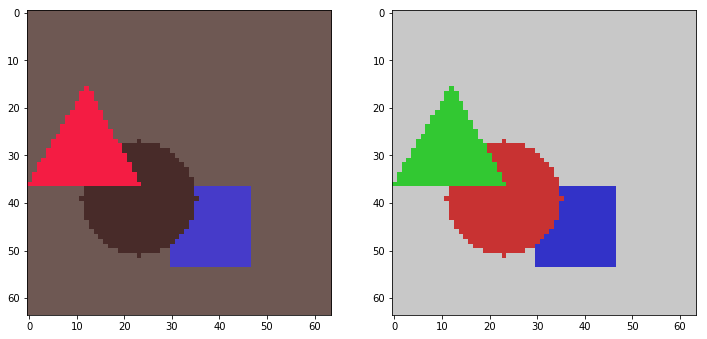

In [15]:
show_example_image("shape_00033.png")

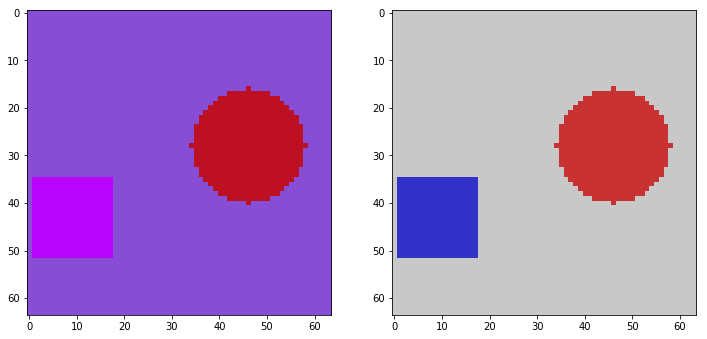

In [16]:
show_example_image("shape_00042.png")

## Dataset handling

One may create a shape dataset easily in two steps. First one has to declare an instance of `ShapeDataset`, by passing an image size as a parameter.

In [17]:
d = shapes.ShapeDataset(48)

At this step, there is not any image in the dataset, however, the label glossary is seeable.

In [18]:
[item['name'] for item in d.label_info]

['square', 'circle', 'triangle', 'background']

Then, the dataset must be fillet out with some brand new images. One may specify the image quantity, as well as an output directory if one wants to write these images onto the disk:

In [19]:
d.populate(output_dir=None, nb_images=5)
d.get_nb_images()

5

The dataset may also be loaded starting from an existing dataset: by picking a `.json` configuration file stored in the `preprocessed` folder, one may recover some previously generated files.

In [21]:
preprocess_folder = utils.prepare_preprocessed_folder(DATAPATH, DATASET, 64)
d.load(preprocess_folder["training_config"], 5)
d.get_nb_images()

2019-05-28 10:59:42,841 :: INFO :: __init__ :: load : The dataset has been loaded from ../data/shapes/preprocessed/64/training.json


5